# 教科書用

False PositiveのLCと、LCとcovariatesの関係を明らかにする！！ (IRSFのデータがどっかに行ってしまったんだ・・・)

In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from glob import glob

In [2]:
bands = ['g','r','i','z']
colors = ['b','g','orange','r']

In [3]:
dfs = []
for b in bands:
    file = glob(f'data/TOI05092.01_240215_muscat2_{b}*.csv')[0]
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
import sys
sys.path.append("/ut3/mori/work/git_repo/my_tools/")
import binning

29
29
29
29


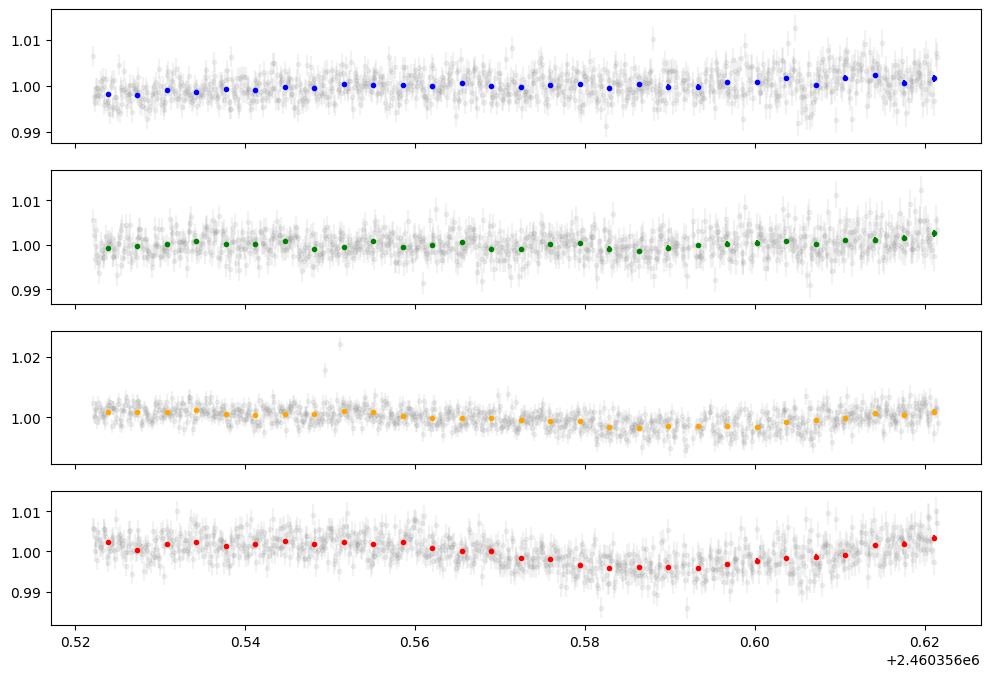

In [23]:
dfs_bin= []
binsize=5/60/24 #day

f, axs =pl.subplots(len(bands),1,figsize=(12, 8),sharex=True)
for n, band in enumerate(bands):
    df = dfs[n]
    time = df['BJD_TDB']
    flux= df['Flux']
    err = df['Err']
    
    axs[n].errorbar(time, flux, err, fmt='.', color='gray', alpha=0.1)
    tbin, fbin, febin = binning.binning_equal_interval(np.array(time), np.array(flux), np.array(err), binsize=binsize, t0=np.array(time)[0])
    axs[n].errorbar(tbin, fbin, febin, fmt='.', color=colors[n])
    
    print(len(tbin))
    
    df_bin = pd.DataFrame({'BJD_TDB':tbin,'Flux':fbin,'Err':febin})
    dfs_bin.append(df_bin)

In [29]:
dfs[0].columns

Index(['BJD_TDB', 'Flux', 'Err', 'Airmass', 'DX(pix)', 'DY(pix)', 'FWHM(pix)',
       'Peak(ADU)'],
      dtype='object')

In [62]:
offset = 2460356

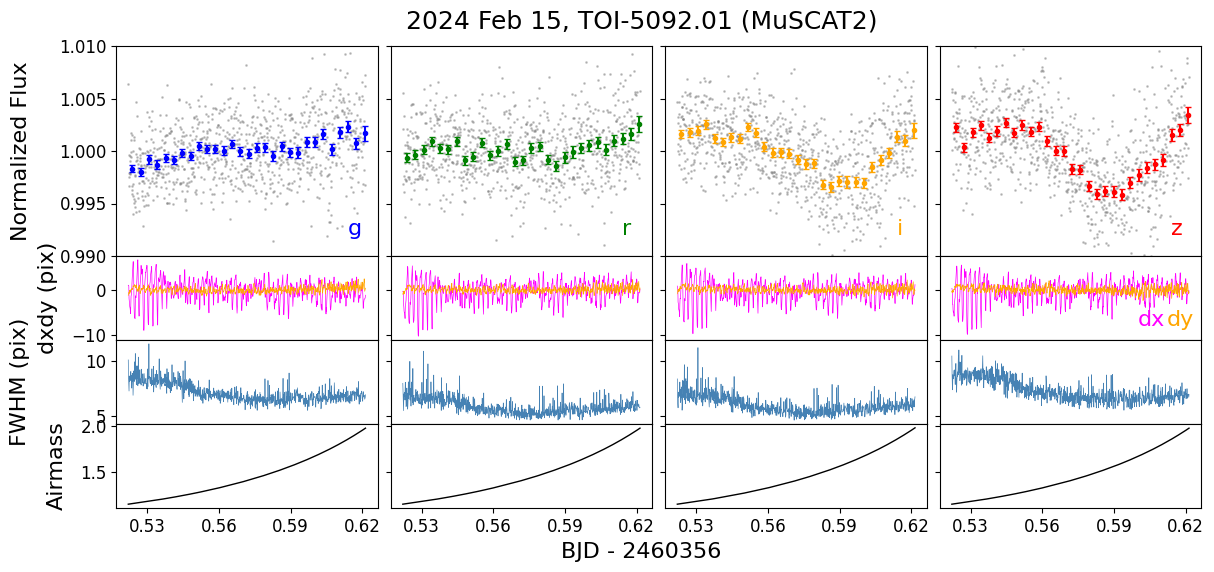

In [115]:
f, axs = pl.subplots(
    4, 4, 
    sharex=True, sharey='row',
    gridspec_kw={"height_ratios": [2.5, 1, 1, 1]},
    figsize=(14, 6)
)
pl.subplots_adjust(wspace=0.05, hspace=0)


for n_b, b in enumerate(bands):
    df = dfs[n_b]
    time = df['BJD_TDB']-offset
    axs[0][n_b].plot(time, df['Flux'], '.', color='gray', alpha=0.4, ms=2)
    
    axs[1][n_b].plot(time, df['DX(pix)'], '-', color='magenta', lw=0.5)
    axs[1][n_b].plot(time, df['DY(pix)'], '-', color='orange', lw=0.5)
    
    axs[2][n_b].plot(time, df['FWHM(pix)'], '-', color='steelblue', lw=0.5)
    axs[3][n_b].plot(time, df['Airmass'], '-', color='k', lw=1)
    
    df = dfs_bin[n_b]
    time = df['BJD_TDB']-offset
    axs[0][n_b].errorbar(time, df['Flux'], df['Err'], fmt='.', color=colors[n_b], capsize=2)
    axs[0][n_b].set_ylim(0.99, 1.01)
    
    for i in range(4):
        axs[i][n_b].tick_params(axis='both', which='major', labelsize=12)
        
    axs[0][n_b].text(0.614, 0.992, b, color=colors[n_b], fontsize=16)

    
axs[1][3].text(0.6, -8, 'dx', color='magenta', fontsize=16)
axs[1][3].text(0.612, -8, 'dy', color='orange', fontsize=16)


f.supxlabel(f'BJD - {offset}', fontsize=16, y=0.02)
axs[0][0].set_ylabel('Normalized Flux', fontsize=16, labelpad=20)
axs[1][0].set_ylabel('dxdy (pix)', fontsize=16, labelpad=10)
axs[2][0].set_ylabel('FWHM (pix)', fontsize=16, labelpad=40)
axs[3][0].set_ylabel('Airmass', fontsize=16, labelpad=10)

f.suptitle("2024 Feb 15, TOI-5092.01 (MuSCAT2)", fontsize=18, y=0.94)

for i in range(4):
    for j in range(4):
        axs[i][j].set_xticks([0.53, 0.56, 0.59, 0.62])  
        
f.savefig('TOI-5092.01_LC.png', bbox_inches='tight')
    

In [50]:
df = dfs[2]

<AxesSubplot: >

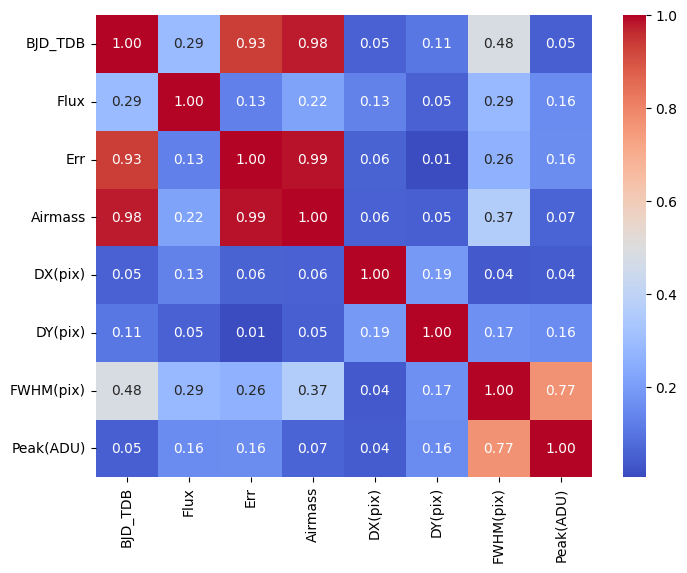

In [51]:
import seaborn as sns

corr = df.corr().abs()
pl.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")